## Imports

In [ ]:
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#mpl.style.use('seaborn-white')
import multiprocess as mp
import numpy as np
import pandas as pd
import cooltools
import cooler
#import bbi
import bioframe
import math

import glob, os
import os.path
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import linear_model, datasets

# Figure 2 - Compartments

# Figure 2a - Heatmaps

In [ ]:
out_path="/Figures/"

In [ ]:
filename1="4DNFIF1J6GC5_H1-hESC_ChIA_PET_PolII.mcool"
filename2="4DNFIK3276U7_H1-hESC_ChIA_PET_CTCF.mcool"
filename3="4DNFICOGAKW2_H1-hESC_PLAC-Seq.mcool"
filename4="4DNFI9GMP2J8_H1-hESC_MicroC.mcool"
filename5="4DNFI82R42AD_H1-hESC_FA_DSG_DpnII_Hi-C.mcool"
filename6="4DNFIV3PDS5F_4DNFIIY1TXUZ_H1-hESC_DNA_clusters_R1_R2_2-100.mcool"
filename7="H1hESC.GAM.NPMI.normalized.pairwise.curated.matrices.at100Kb.mcool"

path="./"


In [ ]:
hg38 = bioframe.fetch_chromsizes('hg38')
chromsizes = bioframe.fetch_chromsizes('hg38')
chromosomes = list(chromsizes.index)

print(filename1,filename2,filename3,filename4,filename5,filename6,filename7)

conditions = [ 'ChIA_PET_PolII' ,
    'ChIA_PET_CTCF' ,
    'PLAC-Seq' ,
    'MicroC' ,
    'FA_DSG_DpnII_Hi-C' ,
    'SPRITE',
    'GAM']


cool = [filename1,filename2,filename3,filename4,filename5,filename6,filename7]


cooler_paths = {    
    'ChIA_PET_PolII' : path+filename1+'::/resolutions/100000',
    'ChIA_PET_CTCF' : path+filename2+'::/resolutions/100000',
    'PLAC-Seq' : path+filename3+'::/resolutions/100000',
    'MicroC' : path+filename4+'::/resolutions/100000',
    'FA_DSG_DpnII_Hi-C' : path+filename5+'::/resolutions/100000',
    'SPRITE' : path+filename6+'::/resolutions/100000',
    'GAM' : path+filename7+'::/resolutions/100000'
}


long_names = {
    'ChIA_PET_PolII' : 'ChIA-PET PolII',
    'ChIA_PET_CTCF' : 'ChIA-PET CTCF',
    'PLAC-Seq' : 'PLAC-Seq',
    'MicroC' : 'MicroC',
    'FA_DSG_DpnII_Hi-C' : 'Hi-C',
    'SPRITE' : 'SPRITE',
    'GAM' : 'GAM'}

clrs = {
    cond: cooler.Cooler(cooler_paths[cond]) for cond in conditions
}


In [ ]:
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(nrows=3,ncols=3)


for k,cond in enumerate(np.sort(conditions)):
    print(cond)
    ax = plt.subplot(gs[k])
    x,y=clrs[cond].extent("chr19")
    #print(x)
    #print(y)
    x1=x+300
    y1=y
    if cond=='GAM':
        mat = clrs[cond].matrix(balance=False, sparse=True)[x1:y1, x1:y1]
        print(mat.shape)
        arr = mat.toarray()
        arr_tmp=mat.toarray()
        arr_tmp=arr_tmp[arr_tmp>0]
        vmin=np.percentile(arr_tmp, 10)
        vmax=np.percentile(arr_tmp, 90)
        print(vmin)
        print(vmax)
        im =ax.matshow(arr, cmap='YlOrRd',vmin=vmin,vmax=vmax)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title(long_names[cond], fontdict={'fontsize': 30, 'fontweight': 'medium'})
        plt.colorbar(im)
    else:
        mat = clrs[cond].matrix(balance=True, sparse=True)[x1:y1, x1:y1]
        arr = mat.toarray()       
        arr_tmp=mat.toarray()  
        arr_tmp=arr_tmp[arr_tmp>0]
        vmin=np.percentile(np.log10(arr_tmp), 10)
        vmax=np.percentile(np.log10(arr_tmp), 90)
        print(vmin)
        print(vmax)
        im =ax.matshow(np.log10(arr), cmap='YlOrRd',vmin=vmin,vmax=vmax)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title(long_names[cond], fontdict={'fontsize': 30, 'fontweight': 'medium'})
        plt.colorbar(im)
    #l=l+1
plt.savefig('H1-hESC_chr19_100kb_30000000-58700000.pdf')

# Figure 2b -  Compartment Score correlations

In [196]:
names = ["HFFc6 MicroC",
"HFFc6 PLAC-Seq",
"HFFc6 Hi-C",
"HFFc6 ChIA-PET CTCF",
"HFFc6 ChIA-PET PolII",
"HFFc6 SPRITE",      
"H1-hESC MicroC",
"H1-hESC Hi-C",
"H1-hESC PLAC-Seq",
"H1-hESC ChIA-PET PolII",
"H1-hESC ChIA-PET CTCF",
"Hi-hESC GAM",
"H1-hESC SPRITE"]

files=[
"4DNFI9FVHJZQ_HFFc6_MicroC.cis.100000.vecs.tsv",
"4DNFI9REIU8H_HFFc6_PLAC-Seq.cis.100000.vecs.tsv",
"4DNFIAVXXO55_HFFc6_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv",
"4DNFIELOAD41_HFFc6_ChIA_PET_CTCF.cis.100000.vecs.tsv",
"4DNFIOOSHTQV_HFFc6_ChIA_PET_PolII.cis.100000.vecs.tsv",
"4DNFIP9HGF9M_HFFc6_SPRITE.100000.cis.vecs.tsv",     
"4DNFI9GMP2J8_H1-hESC_MicroC.cis.100000.vecs.tsv",
"4DNFI82R42AD_H1-hESC_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv",
"4DNFICOGAKW2_H1-hESC_PLAC-Seq.cis.100000.vecs.tsv",
"4DNFIF1J6GC5_H1-hESC_ChIA_PET_PolII.cis.100000.vecs.tsv",
"4DNFIK3276U7_H1-hESC_ChIA_PET_CTCF.cis.100000.vecs.tsv",
"GAM_H1_new.ALL.AB.at100Kb.final.chosen_formatted.tsv",
"4DNFITX6WCRT_H1-hESC_DNA.cis.100000.vecs.tsv"]
       


i=0
E1_data=pd.DataFrame()
file_list=[]
os.chdir("compartments/")
for file_name in files:
    if file_name == "4DNFI9FVHJZQ_HFFc6_MicroC.cis.100000.vecs.tsv":
        print(file_name)
        file=pd.read_csv(file_name,sep="\t")
        
        E1_data=file
        E1_data=E1_data[E1_data.loc[:,"chrom"]!="chrY"]
        E1_data=E1_data[E1_data.loc[:,"chrom"]!="chrX"]
        E1_data["combined"]=E1_data["chrom"]+E1_data["start"].astype(str)+E1_data["end"].astype(str)
        E1_data=E1_data[["combined","E1"]]
    else:
        print(file_name)
        file=pd.read_csv(file_name,sep="\t")
        file=file[file.loc[:,"chrom"]!="chrY"]
        file=file[file.loc[:,"chrom"]!="chrX"]
        file["combined"]=file["chrom"]+file["start"].astype(str)+file["end"].astype(str)
        file=file[["combined","E1"]]

        E1_data=pd.merge(E1_data,file,on="combined")

#E1_data.columns=names

#E1_data=pd.concat([E1_data,file["chrom"]],axis=1)
#E1_data=pd.concat([E1_data,file["start"]],axis=1)
#E1_data=pd.concat([E1_data,file["end"]],axis=1)
print(E1_data.shape)

#E1_data_new_chr1=E1_data_new[E1_data_new.loc[:,"chrom"]=='chr1']


E1_data_new=E1_data.iloc[:,1:]


E1_data_new.columns=names
#print(E1_data_new.head)


#for col in E1_data_new:
#    E1_data_new=E1_data_new[E1_data_new.loc[:,col].notnull()]
#print(E1_data_new.shape)  


#E1_data_new.to_csv(out_path+"Compartment_Scores_all_methods.csv")
#print(E1_data.head)

4DNFI9FVHJZQ_HFFc6_MicroC.cis.100000.vecs.tsv
4DNFI9REIU8H_HFFc6_PLAC-Seq.cis.100000.vecs.tsv
4DNFIAVXXO55_HFFc6_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv
4DNFIELOAD41_HFFc6_ChIA_PET_CTCF.cis.100000.vecs.tsv
4DNFIOOSHTQV_HFFc6_ChIA_PET_PolII.cis.100000.vecs.tsv
4DNFIP9HGF9M_HFFc6_SPRITE.100000.cis.vecs.tsv
4DNFI9GMP2J8_H1-hESC_MicroC.cis.100000.vecs.tsv
4DNFI82R42AD_H1-hESC_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv
4DNFICOGAKW2_H1-hESC_PLAC-Seq.cis.100000.vecs.tsv
4DNFIF1J6GC5_H1-hESC_ChIA_PET_PolII.cis.100000.vecs.tsv
4DNFIK3276U7_H1-hESC_ChIA_PET_CTCF.cis.100000.vecs.tsv
GAM_H1_new.ALL.AB.at100Kb.final.chosen_formatted.tsv
4DNFITX6WCRT_H1-hESC_DNA.cis.100000.vecs.tsv
(25668, 14)


In [197]:
for col in E1_data_new:
    E1_data_new=E1_data_new[E1_data_new.loc[:,col].notnull()]
print(E1_data_new.shape)    

(24258, 13)


In [198]:
all_corr=E1_data_new.corr(method='spearman')

In [199]:
all_corr.to_csv(out_path+"H1-hESC_compartment_correlations.csv")

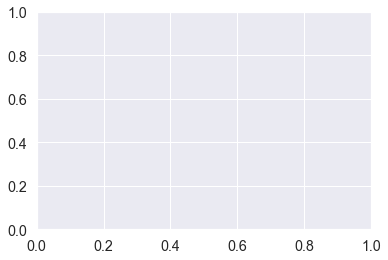

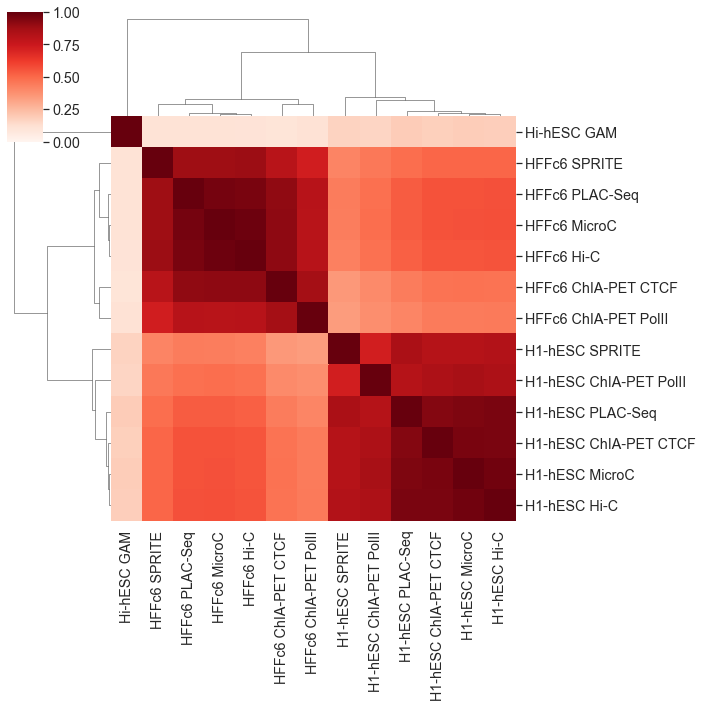

In [206]:
import numpy as np; np.random.seed(0)
import seaborn as sns;


fig, (ax) = plt.subplots(1, 1)
sns.set(font_scale=1.3)

ax = sns.clustermap(all_corr,cmap='Reds',annot=False,vmin=0, vmax=1,annot_kws={'size': 12})


plt.savefig(out_path+"Figure_2b_Comp_correlations_100kb.pdf",bbox_inches='tight')


# Figure 2c - Compartment strength quantifications

In [ ]:
# The functions below were added to saddle.py script in cooltools 
# Here AA and BB compartments quantified seperately

def saddle_strength_middle(S, C):
    """
    Parameters
    ----------
    S, C : 2D arrays, square, same shape
        Saddle sums and counts, respectively
    Returns
    -------
    1D array
    Ratios of cumulative corner interaction scores, where the saddle data is
    grouped over the AA+BB corners and AB+BA corners with increasing extent.
    """
    m, n = S.shape
    if m != n:
        raise ValueError("`saddledata` should be square.")

    ratios = np.zeros(n)
    for k in range(1, n):
        intra_sum = S[k:n-k, k:n-k].sum()
        intra_count = C[k:n-k, k:n-k].sum()
        intra = intra_sum / intra_count

        # NO NEED to modify the inter - part 
        # as it is symmetrical and it's still
        # a fair average , when 

        inter_sum = S[0:k, n-k:n].sum() + S[n-k:n, 0:k].sum()
        inter_count = C[0:k, n-k:n].sum() + C[n-k:n, 0:k].sum()
        inter = inter_sum / inter_count

        ratios[k] = intra / inter
    return ratios



def saddle_strength_lowerright(S, C):
    """
    Parameters
    ----------
    S, C : 2D arrays, square, same shape
        Saddle sums and counts, respectively
    Returns
    -------
    1D array
    Ratios of cumulative corner interaction scores, where the saddle data is
    grouped over the AA+BB corners and AB+BA corners with increasing extent.
    """
    print(S.shape)

    S_mod = S[~np.all(S == 0, axis=0)]
    S_mod = S_mod[:S_mod.shape[0],:S_mod.shape[0]]

    print(S_mod.shape)
    S=S_mod

    m, n = S.shape
    if m != n:
        raise ValueError("`saddledata` should be square.")

    ratios = np.zeros(n)
    for k in range(1, n):
        # lower right  - aka AA

        intra_sum = S[n-k:n, n-k:n].sum()
        intra_count = C[n-k:n, n-k:n].sum()
        intra = intra_sum / intra_count

        inter_sum = S[0:k, n-k:n].sum() + S[n-k:n, 0:k].sum()
        inter_count = C[0:k, n-k:n].sum() + C[n-k:n, 0:k].sum()
        inter = inter_sum / inter_count

        ratios[k] = intra / inter
    return ratios



def saddle_strength_upperleft(S, C):
    """
    Parameters
    ----------
    S, C : 2D arrays, square, same shape
        Saddle sums and counts, respectively
    Returns
    -------
    1D array
    Ratios of cumulative corner interaction scores, where the saddle data is
    grouped over the AA+BB corners and AB+BA corners with increasing extent.
    """
    m, n = S.shape
    if m != n:
        raise ValueError("`saddledata` should be square.")

    ratios = np.zeros(n)
    for k in range(1, n):
        # upper left - aka BB
        intra_sum = S[0:k, 0:k].sum()
        intra_count = C[0:k, 0:k].sum()
        intra = intra_sum / intra_count


        inter_sum = S[0:k, n-k:n].sum() + S[n-k:n, 0:k].sum()
        inter_count = C[0:k, n-k:n].sum() + C[n-k:n, 0:k].sum()
        inter = inter_sum / inter_count

        ratios[k] = intra / inter
    return ratios

In [ ]:
# The code below were added to compute_saddle function in compute_saddle.py script in cooltools 
if strength:
    ratios = saddle.saddle_strength(S, C)
    ratios = ratios[1:-1]  # drop outlier bins
    to_save["saddle_strength"] = ratios
    ratios_lowright=saddle.saddle_strength_lowerright(S, C)
    ratios_upleft=saddle.saddle_strength_upperleft(S, C)
    ratios_mid=saddle.saddle_strength_middle(S, C)
    ratios_all=[ratios_upleft[10],ratios_mid[10],ratios_lowright[10]]
    ratios_all_dict["ratios"]=ratios_all

# Save data
np.savez(out_prefix + ".saddledump_corners",  # .npz auto-added
    **ratios_all_dict)

4DNFI82R42AD_H1-hESC_FA_DSG_DpnII_Hi-C_quantiles.saddledump_corners.npz
[2.4651427359502684, 1.8203798893059846, 3.1942461845231693]
4DNFI9GMP2J8_H1-hESC_MicroC_quantiles.saddledump_corners.npz
[2.1188227939999105, 1.6404796973761204, 2.733246937281261]
4DNFICOGAKW2_H1-hESC_PLAC-Seq_quantiles.saddledump_corners.npz
[2.534833506968519, 1.8739944470968048, 3.0440612567332717]
4DNFIF1J6GC5_H1-hESC_ChIA_PET_PolII_quantiles.saddledump_corners.npz
[2.8024984605658405, 1.834832486063365, 3.5252391501496696]
4DNFIK3276U7_H1-hESC_ChIA_PET_CTCF_quantiles.saddledump_corners.npz
[2.297427224107463, 1.7011362854583791, 2.9654461378697112]
4DNFIV3PDS5F_4DNFIIY1TXUZ_H1-hESC_DNA_clusters_R1_R2_2-100_quantiles.saddledump_corners.npz
[3.7451834419147443, 2.1160561690711654, 4.1167376657599775]
H1hESC.GAM.NPMI.normalized.pairwise.curated.matrices.at100Kb_new.saddledump.npz


<Figure size 432x288 with 0 Axes>

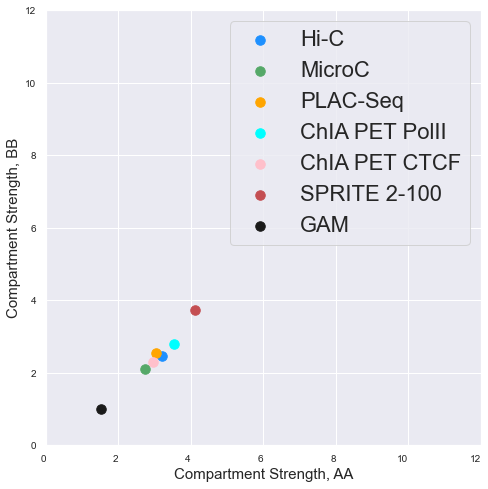

In [54]:
name_list=['Hi-C', 'MicroC', 'PLAC-Seq','ChIA PET PolII','ChIA PET CTCF' ,'SPRITE 2-100',"GAM"]

c=['dodgerblue','g','orange','cyan','pink','r','k']

cell_line="ESC"
i=0
names_list=[]
BB_list=[]
AA_list=[]
#name_list=[]
os.chdir("/npz_files")
plt.clf()

fig, ax = plt.subplots(figsize=(8,8))


for file in sorted(glob.glob("*"+cell_line+"*.npz")):
    print(file)
    file_name = np.load(file)
    name=file.split('.')[0]
    name=name.split('1-')[1]
    strength=list(file_name["ratios"])
    print(strength)
    BB_tmp=strength[0]
    AA_tmp=strength[2]
    BB_list.append(BB_tmp)
    AA_list.append(AA_tmp)
for i in range(len(c)):
    ax.scatter(AA_list[i],BB_list[i],color=c[i], s=90, marker='o',label=name_list[i])
ax.set_xlabel("Compartment Strength, AA",fontsize=15)
ax.set_ylabel("Compartment Strength, BB",fontsize=15)
ax.set_aspect('equal', 'box')
#ax.axis('equal')
plt.setp(ax.get_xticklabels(), fontsize=10, horizontalalignment="right")
plt.setp(ax.get_yticklabels(), fontsize=10, horizontalalignment="right")
ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.legend()
BB_list
plt.savefig(out_path+"Figure_2c_H1-hESC.pdf")


In [ ]:

cell_line="HFFc6"
i=0
names_list=[]
BB_list=[]
AA_list=[]
name_list=[]
os.chdir("/npz_files")
for file in sorted(glob.glob("*"+cell_line+"*.npz")):
	print(file)
    

6
4DNFI9FVHJZQ_HFFc6_MicroC_quantiles.saddledump_corners.npz
4DNFI9FVHJZQ_HFFc6_MicroC
[3.6651209608412567, 1.8949718873885697, 2.9537934139192332]
4DNFI9REIU8H_HFFc6_PLAC-Seq_quantiles.saddledump_corners.npz
4DNFI9REIU8H_HFFc6_PLAC-Seq
[5.16803646355291, 2.828615312484335, 6.050740833886499]
4DNFIAVXXO55_HFFc6_FA_DSG_DpnII_Hi-C_quantiles.saddledump_corners.npz
4DNFIAVXXO55_HFFc6_FA_DSG_DpnII_Hi-C
[9.214975682803948, 3.733997998375283, 8.154035215984816]
4DNFIELOAD41_HFFc6_ChIA_PET_CTCF_quantiles.saddledump_corners.npz
4DNFIELOAD41_HFFc6_ChIA_PET_CTCF
[6.408928028374868, 2.8146476145593766, 5.603225584885729]
4DNFIOOSHTQV_HFFc6_ChIA_PET_PolII_quantiles.saddledump_corners.npz
4DNFIOOSHTQV_HFFc6_ChIA_PET_PolII
[3.3430090894768143, 1.709620972820173, 2.661247512130866]
4DNFIRXON7Z2_HFFc6_DNA_clusters_R1_R2_2-100_quantiles.saddledump_corners.npz
4DNFIRXON7Z2_HFFc6_DNA_clusters_R1_R2_2-100
[9.626664841869466, 3.9679132920839306, 5.0035251650669075]


<Figure size 432x288 with 0 Axes>

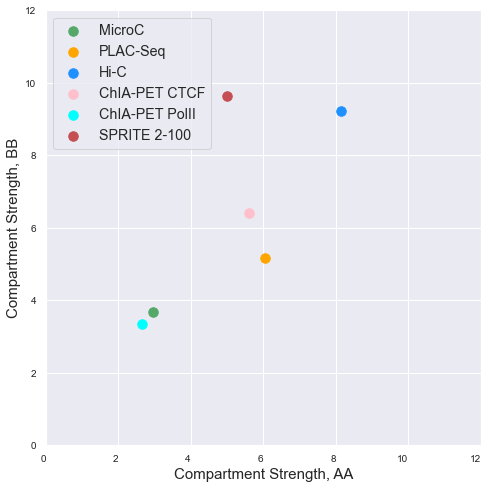

In [153]:
name_list=[ 'MicroC', 'PLAC-Seq','Hi-C','ChIA-PET CTCF', 'ChIA-PET PolII','SPRITE 2-100']

c=['g','orange','dodgerblue','pink','cyan','r']


cell_line="HFFc6"
print(len(name_list))
i=0
names_list=[]
BB_list=[]
AA_list=[]
#name_list=[]
os.chdir("npz_files")
plt.clf()
fig, ax = plt.subplots(figsize=(8,8))
for file in sorted(glob.glob("*"+cell_line+"*.npz")):
	print(file)
	file_name = np.load(file)
	name=file.split('.')[0]
	name=name.split('_q')[0]
	strength=list(file_name["ratios"])
	print(strength)
	BB_tmp=strength[0]
	AA_tmp=strength[2]
	BB_list.append(BB_tmp)
	AA_list.append(AA_tmp)
m=["o","o","o","o","v","v","v","v","s","s","s","s"]
for i in range(len(c)):
    ax.scatter(AA_list[i],BB_list[i],color=c[i], s=90, marker='o',label=name_list[i])
ax.set_xlabel("Compartment Strength, AA",fontsize=15)
ax.set_ylabel("Compartment Strength, BB",fontsize=15)
ax.set_aspect('equal', 'box')
plt.setp(ax.get_xticklabels(), fontsize=10, horizontalalignment="right")
plt.setp(ax.get_yticklabels(), fontsize=10, horizontalalignment="right")
ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.legend()
plt.savefig(out_path+"Figure_2c_HFFc6.pdf")


# Figure 2d - Insulation Score correlation

In [158]:
ins_files=[
"4DNFI9FVHJZQ_HFFc6_MicroC.25kb.cis.bed",
"4DNFI9GMP2J8_H1-hESC_MicroC.25kb.cis.bed",
"4DNFI9REIU8H_HFFc6_PLAC-Seq.25kb.cis.bed",
"4DNFI82R42AD_H1-hESC_FA_DSG_DpnII_Hi-C.25kb.cis.bed",
"4DNFIAVXXO55_HFFc6_FA_DSG_DpnII_Hi-C.25kb.cis.bed",
"4DNFICOGAKW2_H1-hESC_PLAC-Seq.25kb.cis.bed",
"4DNFIELOAD41_HFFc6_ChIA_PET_CTCF.25kb.cis.bed",
"4DNFIF1J6GC5_H1-hESC_ChIA_PET_PolII.25kb.cis.bed",
"4DNFIK3276U7_H1-hESC_ChIA_PET_CTCF.25kb.cis.bed",
"4DNFIOOSHTQV_HFFc6_ChIA_PET_PolII.25kb.cis.bed",
"4DNFIRXON7Z2_HFFc6_DNA_clusters_R1_R2_2-100.25kb.cis.bed",
"4DNFIV3PDS5F_4DNFIIY1TXUZ_H1-hESC_DNA_clusters_R1_R2_2-100.25kb.cis.bed",
"GAM_H1_new.IS.scores.at25Kb_formatted.bed"]


names = [
"HFFc6 MicroC",
"H1-hESC MicroC",
"HFFc6 PLAC-Seq",
"H1-hESC Hi-C",
"HFFc6 Hi-C",
"H1-hESC PLAC-Seq",
"HFFc6 ChIA-PET CTCF",
"H1-hESC ChIA-PET PolII",
"H1-hESC ChIA-PET CTCF",
"HFFc6 ChIA-PET_PolII",
"HFFc6 SPRITE",
"H1-hESC SPRITE",
"H1-hESC GAM"]


4DNFI9FVHJZQ_HFFc6_MicroC.25kb.cis.bed
4DNFI9GMP2J8_H1-hESC_MicroC.25kb.cis.bed
4DNFI9REIU8H_HFFc6_PLAC-Seq.25kb.cis.bed
4DNFI82R42AD_H1-hESC_FA_DSG_DpnII_Hi-C.25kb.cis.bed
4DNFIAVXXO55_HFFc6_FA_DSG_DpnII_Hi-C.25kb.cis.bed
4DNFICOGAKW2_H1-hESC_PLAC-Seq.25kb.cis.bed
4DNFIELOAD41_HFFc6_ChIA_PET_CTCF.25kb.cis.bed
4DNFIF1J6GC5_H1-hESC_ChIA_PET_PolII.25kb.cis.bed
4DNFIK3276U7_H1-hESC_ChIA_PET_CTCF.25kb.cis.bed
4DNFIOOSHTQV_HFFc6_ChIA_PET_PolII.25kb.cis.bed
4DNFIRXON7Z2_HFFc6_DNA_clusters_R1_R2_2-100.25kb.cis.bed
4DNFIV3PDS5F_4DNFIIY1TXUZ_H1-hESC_DNA_clusters_R1_R2_2-100.25kb.cis.bed
GAM_H1_new.IS.scores.at25Kb_formatted.bed
   HFFc6 MicroC  H1-hESC MicroC  HFFc6 PLAC-Seq  H1-hESC Hi-C  HFFc6 Hi-C  \
0           NaN             NaN             NaN           NaN         NaN   
1           NaN             NaN             NaN           NaN         NaN   
2           NaN             NaN             NaN           NaN         NaN   
3           NaN             NaN             NaN           NaN    

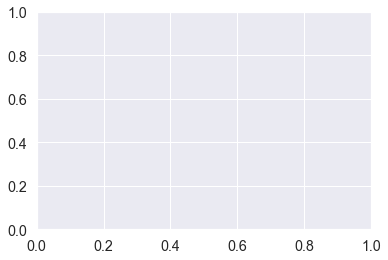

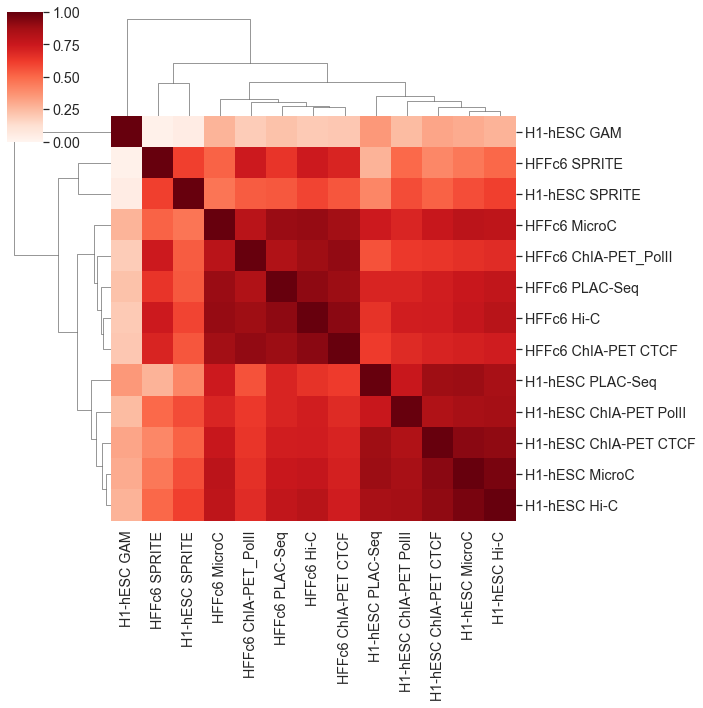

In [160]:
i=0
ins_path="insulation/"
ins_data=pd.DataFrame()
file_list=[]
for file_name in ins_files:
    if file_name == "4DNFI9FVHJZQ_HFFc6_MicroC.25kb.cis.bed":
        print(file_name)
        file=pd.read_csv(ins_path+file_name,sep="\t")
        
        ins_data=file
        ins_data=ins_data[ins_data.loc[:,"chrom"]!="chrY"]
        ins_data=ins_data[ins_data.loc[:,"chrom"]!="chrX"]
        ins_data["combined"]=ins_data["chrom"]+ins_data["start"].astype(str)+ins_data["end"].astype(str)
        ins_data=ins_data[["combined","log2_insulation_score_100000"]]
    else:
        print(file_name)
        file=pd.read_csv(ins_path+file_name,sep="\t")
        file=file[file.loc[:,"chrom"]!="chrY"]
        file=file[file.loc[:,"chrom"]!="chrX"]
        file["combined"]=file["chrom"]+file["start"].astype(str)+file["end"].astype(str)
        file=file[["combined","log2_insulation_score_100000"]]

        ins_data=pd.merge(ins_data,file,on="combined")

ins_data=ins_data.iloc[:,1:]        
ins_data.columns=names
print(ins_data.head(5))

ins_corr=ins_data.corr(method='pearson')


import numpy as np; np.random.seed(0)
import seaborn as sns;
fig, (ax) = plt.subplots(1, 1)
sns.set(font_scale=1.3)
ax = sns.clustermap(ins_corr,cmap='Reds',annot=False,vmin=0, vmax=1,annot_kws={'size': 12})
plt.savefig(out_path+"Figure_2d_insulation_corr_25kb.pdf")



# Figure 2e - Insulation Pileup

In [ ]:
# Needs to run the script below in high performance computing cluster or aws
python Figure_2e_insulation_pileup_H1-hESC_HFFc6.py


# Figure 2g - Compute enrichment of 1D datasets in all 3D methods

In [ ]:
# Bin 1D datasets into 50kb bins 

%% bash

bash Fig2g_H1-hESC_HFFc6_bin_bed_files.sh

In [ ]:
# Take E/L ratio for Early and Late replication

## H1-hESC

E_file="H1-hESC_E_L_counts_4DNFI4BSJRMF.binned.50kb.bed"
L_file="H1-hESC_E_L_counts_4DNFIISI1ZA8.binned.50kb.bed"


E_data=pd.read_csv(E_file,sep="\t")
L_data=pd.read_csv(L_file,sep="\t")

E_data.iloc[:,3] = E_data.iloc[:,3].fillna(0)
L_data.iloc[:,3] = L_data.iloc[:,3].fillna(0)

E_data.iloc[:,3]=pd.to_numeric(E_data.iloc[:,3],errors='coerce')

L_data.iloc[:,3]=pd.to_numeric(L_data.iloc[:,3],errors='coerce')

E_L_divison=[E_data.iloc[i,3]/L_data.iloc[i,3] for i in range(E_data.shape[0])]

E_L_data=pd.concat([E_data.iloc[:,[0,1,2]],pd.DataFrame(E_L_divison)],axis=1)
print(E_L_data.head(5))
E_L_data.columns=["chrom","start","end","E1"]
print(E_L_data.head(5))

E_L_data.to_csv("H1-hESC_E_L_counts_4DNFI4BSJRMF_4DNFIISI1ZA8.binned.50kb.bed",index= None,sep="\t")


## HFFc6

E_file="HFFc6_E_L_counts_4DNFI7EOU166.binned.50kb.bed"
L_file="HFFc6_E_L_counts_4DNFI9FTS684.binned.50kb.bed"



E_data=pd.read_csv(E_file,sep="\t")
L_data=pd.read_csv(L_file,sep="\t")

E_data.iloc[:,3] = E_data.iloc[:,3].fillna(0)
L_data.iloc[:,3] = L_data.iloc[:,3].fillna(0)

E_data.iloc[:,3]=pd.to_numeric(E_data.iloc[:,3],errors='coerce')

L_data.iloc[:,3]=pd.to_numeric(L_data.iloc[:,3],errors='coerce')

E_L_divison=[E_data.iloc[i,3]/L_data.iloc[i,3] for i in range(E_data.shape[0])]

E_L_data=pd.concat([E_data.iloc[:,[0,1,2]],pd.DataFrame(E_L_divison)],axis=1)
print(E_L_data.head(5))
E_L_data.columns=["chrom","start","end","E1"]
E_L_data.to_csv("HFFc6_E_L_counts_4DNFI7EOU166_4DNFI9FTS684.binned.50kb.bed",index= None,sep="\t")

In [ ]:
# Find the min and max for 1D data to specify --range parameter in saddle plot

path='oneD/'
comp_bed=[
"H1-hESC_DamID-seq_normalized_counts_4DNFIXNBG8L1_2.binned.bed",
"H1-hESC_E_L_counts_4DNFI4BSJRMF_4DNFIISI1ZA8.binned.50kb.bed",
"H1-hESC_TSA-seq_normalized_counts_4DNFI625PP2A_2_binned.bed",
"H1-hESC_TSA-seq_normalized_counts_4DNFICLC27JC_2_binned.bed",
"H1-hESC_TSA-seq_normalized_counts_4DNFIFNIK4HD_2_binned.bed",
"H1-hESC_TSA-seq_normalized_counts_4DNFILHYV7Q7_2_binned.bed",
"H1-hESC_TSA-seq_normalized_counts_4DNFILYDJU8T_2_binned.bed"]
for file in comp_bed: 
    data=pd.read_csv(path+file,sep="\t")
    print(file)
    
    data=data[data['E1'].notnull()]
    val=data["E1"]
    
    print(np.nanmin(val[val != -np.inf]))
    print(np.nanmax(val[val != np.inf]))


In [ ]:
# Find the min and max for 1D data to specify --range parameter in saddle plot

path='oneD/'
comp_bed=[
"HFFc6_DamID-seq_normalized_counts_4DNFI7724Y7Q_2.binned.50kb.bed",
"HFFc6_E_L_counts_4DNFI7EOU166_4DNFI9FTS684.binned.50kb.bed",
"HFFc6_TSA-seq_normalized_counts_4DNFI6FTPH5V_2.binned.50kb.bed",
"HFFc6_TSA-seq_normalized_counts_4DNFI8CJWFUT_2.binned.50kb.bed",
"HFFc6_TSA-seq_normalized_counts_4DNFIEWPL92Y_2.binned.50kb.bed",
"HFFc6_TSA-seq_normalized_counts_4DNFIHYF6H13_2.binned.50kb.bed",
"HFFc6_TSA-seq_normalized_counts_4DNFIMTKDNJW_2.binned.50kb.bed"]

for file in comp_bed: 
    data=pd.read_csv(path+file,sep="\t")#,dtype={"E1": np.float64})#,header=None)
    print(file)
    filename=file.split('.')[0]
    data.columns=['chrom', 'start', 'end', 'E1']
    print(data.head(4))
    data.to_csv(filename+'_50kb.bed',sep="\t")
    
    data=data[data['E1'].notnull()]
    data=data[data['E1']!="NAN"]
    val=data["E1"]
    
    print(np.nanmax(val[val != np.inf]))
    print(np.nanmin(val[val != -np.inf]))


In [ ]:
# Compute saddle plots using 1D data for sorting

%% bash

bash Fig2g_H1-hESC_HFFc6_saddle_plots.sh



In [ ]:
# Plot saddle plot quantifications
# Used 2nd and 98th percentile for all files 
# H1-hESC

name_list=[
           'FA_DSG_DpnII_Hi-C',
           'MicroC',
           'PLAC-Seq',
           'ChIA_PET_PolII',
           'ChIA_PET_CTCF',
            '2-100',
            'GAM',]

name_list_final=[
           'Hi-C',
           'Micro-C',
           'PLAC-Seq',
           'ChIA-PET PolII',
           'ChIA-PET CTCF',
           'SPRITE',
            'GAM']


filenames=[ 'DamID-seq',
    'H1-hESC_E_L_counts',
    '4DNFI625PP2A',
     '4DNFICLC27JC',  
    "4DNFIFNIK4HD",
    '4DNFILYDJU8T',
    
    ]

filenames_tmp=[ 'DamID-seq',
    'E/L_RT',
    'SON',
    'POLR1E', 
    'NIFK'   ,        
    'LMNB1']

filenames_final=[ 'DamID-seq',
    'E/L RT',
    'SON (TSA-Seq)',
    'POLR1E (TSA-Seq)',
    'NIFK (TSA-Seq)' ,     
    'LMNB1 (TSA-Seq)',
    ]

c=['dodgerblue','g','orange','cyan','pink','r','k',]

total_list_temp=[]
for k in range(7):
    cell_line="ESC"
    #i=0
    #filename=[]
    BB_list=[]
    AA_list=[]
    #name_list=[]
    os.chdir("/Users/betulakgoloksuz/Desktop/gam_new/oneD/npz_July2024_final_normalized_mod/")
    for file in sorted(glob.glob("*"+cell_line+"*"+name_list[k]+"*saddledump_corners.npz")):
        if "4DNFILHYV7Q7" in file:
            continue;


        else:
            print(file)
            file_name = np.load(file)
            name=file.split('.')[0]
           # name=name.split('_q')[0]
            strength=list(file_name["ratios"])
            print(strength)
            BB_tmp=strength[0]
            AA_tmp=strength[2]
            print(AA_tmp)
            BB_list.append(BB_tmp)
            AA_list.append(AA_tmp)

    print(AA_list)
    total_list_temp.append(AA_list)

sns.set(font_scale=2)
total_list=pd.DataFrame()
total_list=pd.DataFrame(total_list_temp)
total_list=total_list.fillna(0)
total_list.replace([np.inf, -np.inf], 0, inplace=True)

print(total_list)

total_list.columns=filenames_final
total_list.index=name_list_final

total_list=total_list.transpose()
ax = sns.clustermap(np.round(total_list,2),vmin=0,vmax=9,cmap="Oranges",annot=True,row_cluster=False,col_cluster=False,fmt='g',annot_kws={"size": 15})

plt.setp(ax.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=90) # For x axis
plt.savefig(out_path+"Figure2g_H1-hESC_August2024.pdf",bbox_inches='tight')



In [ ]:
# Plot saddle plot quantifications
# Used 2nd and 98th percentile for all files 
# HFFc6

name_list=[
           'FA_DSG_DpnII_Hi-C',
           'MicroC',
           'PLAC-Seq',
           'ChIA_PET_PolII',
           'ChIA_PET_CTCF',
            '2-100']

name_list_final=[
           'Hi-C',
           'Micro-C',
           'PLAC-Seq',
           'ChIA-PET PolII',
           'ChIA-PET CTCF',
           'SPRITE']


gs = plt.GridSpec(nrows=1, ncols=1)  
plt.figure(figsize=(10, 10))


filenames=[ 'DamID-seq',
    'HFFc6_E_L_counts',
    '4DNFI6FTPH5V',
    '4DNFIHYF6H13',
    '4DNFIMTKDNJW',     
    '4DNFIEWPL92Y',
    '4DNFI8CJWFUT',
    ]

filenames_tmp=[ 'DamID-seq',
    'E/L_RT',
    'SON',
    'POLR1E',
    'NIFK' ,     
    'LMNB1',
    'CENPB',
    ]

filenames_final=[ 'DamID-seq',
    'E/L RT',
    'SON (TSA-Seq)',
    'POLR1E (TSA-Seq)',
    'NIFK (TSA-Seq)' ,     
    'LMNB1 (TSA-Seq)',
    ]




c=['dodgerblue','g','orange','cyan','pink','r','k',]

total_list_temp=[]
for k in range(6):
    cell_line="HFFc6"
    #i=0
    #filename=[]
    BB_list=[]
    AA_list=[]
    #name_list=[]
    os.chdir("/Users/betulakgoloksuz/Desktop/gam_new/oneD/npz_July2024_final_normalized_mod/")
    for file in sorted(glob.glob("*"+cell_line+"*"+name_list[k]+"*.saddledump_corners.npz")):
        if "4DNFI8CJWFUT" in file:
            continue;
        else:
            print(file)
            file_name = np.load(file)
            name=file.split('.')[0]
           # name=name.split('_q')[0]
            strength=list(file_name["ratios"])
            print(strength)
            BB_tmp=strength[0]
            AA_tmp=strength[2]
            BB_list.append(BB_tmp)
            AA_list.append(AA_tmp)
            print(AA_list)
    total_list_temp.append(AA_list)

sns.set(font_scale=2)
total_list=pd.DataFrame()
total_list=pd.DataFrame(total_list_temp)
total_list=total_list.fillna(0)
print(total_list)
total_list.columns=filenames_final
total_list.index=name_list_final

total_list=total_list.transpose()


ax = sns.clustermap(np.round(total_list,2),vmin=0,vmax=4,cmap="Oranges",annot=True,row_cluster=False,col_cluster=False,fmt='g',annot_kws={"size": 15})
plt.setp(ax.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=90) # For x axis

plt.savefig(out_path+"Figure2g_HFFc6_August2024.pdf",bbox_inches='tight')

# Supplemental Figure 1

# Supplemental Figure 1c - HicRep Correlations

In [ ]:
file=pd.read_csv("hicrep_matrix_for_fig.txt",sep="\t")
pivoted = file.pivot('file1', 'file2')
pivoted = np.triu(pivoted)
pivoted = pivoted + pivoted.T - np.diag(np.diag(pivoted))
#pivoted.columns=[]
data_new=pd.DataFrame(pivoted)

names = ["H1-hESC Hi-C",
         "HFFc6 MicroC",
         "H1-hESC MicroC",
        "HFFc6 PLAC-Seq",      
        "HFFc6 Hi-C",
        "H1-hESC PLAC-Seq",      
        "HFFc6 ChIA-PET CTCF",
        "H1-hESC ChIA-PET PolII",
        "H1-hESC ChIA-PET CTCF",       
        "HFFc6 ChIA-PET PolII",
        "HFFc6 SPRITE",      
        "H1-hESC SPRITE",
        "Hi-hESC GAM"]

data_new.index=names
data_new.columns=names

import numpy as np; np.random.seed(0)
import seaborn as sns;
fig, (ax) = plt.subplots(1, 1)
sns.set(font_scale=1.3Supplemental)
ax = sns.clustermap(data_new,cmap='Reds',annot=False,vmin=0, vmax=1,annot_kws={'size': 12})
plt.savefig(out_path+"Supplementary_Figure_2c_HicRep_50kb.pdf")



# Extended Data Figure 1


# Extended Data Figure 1c, 1d - Compartment strength quantifications

In [ ]:
# Make a mcool file for every cluster in SPRITE
# Compute saddle plot for every cluster in SPRIRE data
# Finally plot the scatter plot scores for every cluster

c=['m','g','orange','b','r','pink','dodgerblue','k']

name_list=["All","1001-10000","101-1000","11-100","2-10","2-100"]


cell_line="ESC"
i=0
names_list=[]
BB_list=[]
AA_list=[]
#name_list=[]
plt.clf()
fig, (ax) = plt.subplots(1, 1)
os.chdir("sprite")
for file in sorted(glob.glob("*"+cell_line+"*.ref.quantiles.saddledump_corners.npz")):
	print(file)
	file_name = np.load(file)
	name=file.split('.')[0]
	name=name.split('1-')[1]
	strength=list(file_name["ratios"])
	print(strength)
	BB_tmp=strength[0]
	AA_tmp=strength[2]
	BB_list.append(BB_tmp)
	AA_list.append(AA_tmp)
for i in range(len(name_list)):
	ax.scatter(AA_list[i],BB_list[i],color=c[i], s=70, marker='o')
	ax.annotate(name_list[i], (AA_list[i],BB_list[i]),fontsize=10,ha='left',color=c[i])

ax.set_xlabel("AA",fontsize=15)
ax.set_ylabel("BB",fontsize=15)
ax.set_aspect('equal', 'box')
plt.setp(ax.get_xticklabels(), fontsize=10, horizontalalignment="right")
plt.setp(ax.get_yticklabels(), fontsize=10, horizontalalignment="right")
ax.set_xlim([1,6])
ax.set_ylim([1,6])
BB_list
plt.savefig("H1-hESC_cis_250kb_AA_BB_all_clusters.pdf")

In [ ]:
c=['m','g','orange','b','r','pink','dodgerblue','k','cyan']

name_list=["All","1001-10000","101-1000","11-100","2-10","2-100","2-2"]

cell_line="HFFc6"
print(len(name_list))
i=0
names_list=[]
BB_list=[]
AA_list=[]
#name_list=[]
plt.clf()
fig, (ax) = plt.subplots(1, 1)
os.chdir("/Users/betulakgoloksuz/Desktop/dekkerlab/Projects/flagship_paper/sprite")
for file in sorted(glob.glob("*"+cell_line+"*.ref.quantiles.saddledump_corners.npz")):
	print(file)
	file_name = np.load(file)
	name=file.split('.')[0]
	name=name.split('_q')[0]
	strength=list(file_name["ratios"])
	print(strength)
	BB_tmp=strength[0]
	AA_tmp=strength[2]
	BB_list.append(BB_tmp)
	AA_list.append(AA_tmp)
m=["o","o","o","o","v","v","v","v","s","s","s","s"]
#plt.clf()
for i in range(len(names)):
	ax.scatter(AA_list[i],BB_list[i],color=c[i], s=70, marker='o')
	ax.annotate(name_list[i], (AA_list[i],BB_list[i]),fontsize=10,ha='left',color=c[i])

ax.set_xlabel("AA",fontsize=15)
ax.set_ylabel("BB",fontsize=15)
ax.set_aspect('equal', 'box')
plt.setp(ax.get_xticklabels(), fontsize=10, horizontalalignment="right")
plt.setp(ax.get_yticklabels(), fontsize=10, horizontalalignment="right")
ax.set_xlim([1,10])
ax.set_ylim([1,10])
plt.savefig("HFFc6_AA_BB_all_clusters.pdf")



# Extended Data Figure 1e - Compartment size cumulative plot

4DNFI9GMP2J8_H1-hESC_MicroC.cis.100000.vecs.tsv
(30894, 9)
398
4DNFI82R42AD_H1-hESC_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv
(30894, 9)
401
4DNFICOGAKW2_H1-hESC_PLAC-Seq.cis.100000.vecs.tsv
(30894, 9)
369
4DNFIF1J6GC5_H1-hESC_ChIA_PET_PolII.cis.100000.vecs.tsv
(30894, 9)
684
4DNFIK3276U7_H1-hESC_ChIA_PET_CTCF.cis.100000.vecs.tsv
(30894, 9)
427
4DNFITX6WCRT_H1-hESC_DNA.cis.100000.vecs.tsv
(30894, 9)
444
GAM_H1_new.ALL.AB.at100Kb.final.chosen_formatted.tsv
(25668, 8)
1204


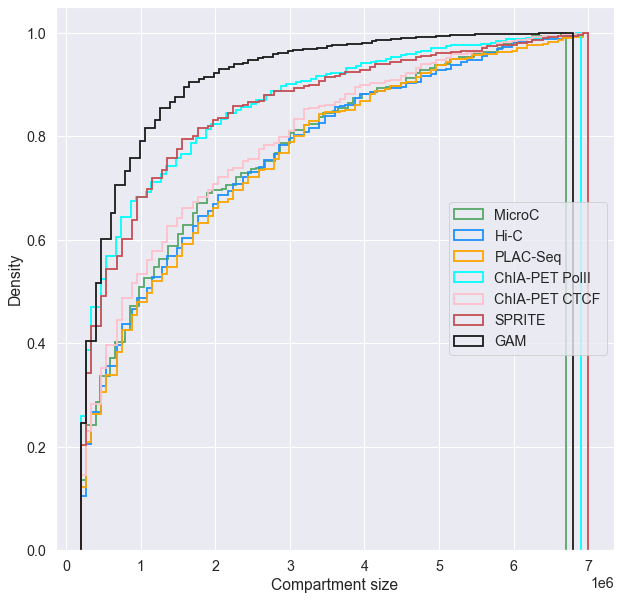

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample

os.chdir("compartments/")


gs = GridSpec(nrows=1, ncols=1)
plt.figure(figsize=(10,10))

names = [      
"MicroC",
"Hi-C",
"PLAC-Seq",
"ChIA-PET PolII",
"ChIA-PET CTCF",
"SPRITE",
"GAM"]

files=[    
"4DNFI9GMP2J8_H1-hESC_MicroC.cis.100000.vecs.tsv",
"4DNFI82R42AD_H1-hESC_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv",
"4DNFICOGAKW2_H1-hESC_PLAC-Seq.cis.100000.vecs.tsv",
"4DNFIF1J6GC5_H1-hESC_ChIA_PET_PolII.cis.100000.vecs.tsv",
"4DNFIK3276U7_H1-hESC_ChIA_PET_CTCF.cis.100000.vecs.tsv",
"4DNFITX6WCRT_H1-hESC_DNA.cis.100000.vecs.tsv",
"GAM_H1_new.ALL.AB.at100Kb.final.chosen_formatted.tsv"]
  
 
    

name_list=['Hi-C', 'MicroC', 'PLAC-Seq','ChIA PET PolII','ChIA PET CTCF' ,'SPRITE 2-100',"GAM"]

c=['g','dodgerblue','orange','cyan','pink','r','k']



k=0
ax = plt.subplot(gs[0])
for file in files:
    print(file)
    data = pd.read_csv(file,sep="\t")
    print(data.shape)
    d=data
    A_start=[]
    A_end=[]
    B_start=[]
    B_end=[]
    A_size=[]
    B_size=[]
    E1=d.columns.get_loc("E1")
    for i in range(len(d["E1"])-1):
        if (d.iloc[i,E1]>0) & (d.iloc[i+1,E1]>0):
            A_val=d.iloc[i,E1]
            A_start.append(d.iloc[i,1])
            A_end.append(d.iloc[i,2])
        if (d.iloc[i,E1]>0) & (d.iloc[i+1,E1]<0):
            B_start=[]
            B_end=[]
            if(len(A_end))>0:
                A_size.append(max(A_end)-min(A_start))
            else:
                A_size.append(d.iloc[i,2]-d.iloc[i,1])
        if (d.iloc[i,E1]<0) & (d.iloc[i+1,E1]<0):
            B_val=d.iloc[i,E1]
            B_start.append(d.iloc[i,1])
            B_end.append(d.iloc[i,2])
        if (d.iloc[i,E1]<0) & (d.iloc[i+1,E1]>0):
            A_start=[]
            A_end=[]
            if(len(B_end))>0:
                B_size.append(max(B_end)-min(B_start))
            else:
                B_size.append(d.iloc[i,2]-d.iloc[i,1] )
    bins=100
    A_size=[x for x in A_size if 100000 < x <= 7000000]
    print(len(A_size))
    A_size_subset=sample(A_size,360)
    n, bins, patches = ax.hist(A_size,bins=bins,density=True, histtype='step',color=c[k],
                           cumulative=True, label=names[k],linewidth=1.8)
    ax.grid(True)
    ax.legend(loc='right')
    ax.set_xlabel('Compartment size')
    ax.set_ylabel('Density')
    #plt.xscale('log')
    k=k+1
plt.savefig(out_path+"Supp_Figure_2d_H1-hESC_comp_size_A.pdf")

4DNFI9GMP2J8_H1-hESC_MicroC.cis.100000.vecs.tsv
(30894, 9)
694
431
4DNFI82R42AD_H1-hESC_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv
(30894, 9)
695
462
4DNFICOGAKW2_H1-hESC_PLAC-Seq.cis.100000.vecs.tsv
(30894, 9)
803
352
4DNFIF1J6GC5_H1-hESC_ChIA_PET_PolII.cis.100000.vecs.tsv
(30894, 9)
2029
782
4DNFIK3276U7_H1-hESC_ChIA_PET_CTCF.cis.100000.vecs.tsv
(30894, 9)
909
464
4DNFITX6WCRT_H1-hESC_DNA.cis.100000.vecs.tsv
(30894, 9)
1328
526
GAM_H1_new.ALL.AB.at100Kb.final.chosen_formatted.tsv
(25668, 8)
3224
1096


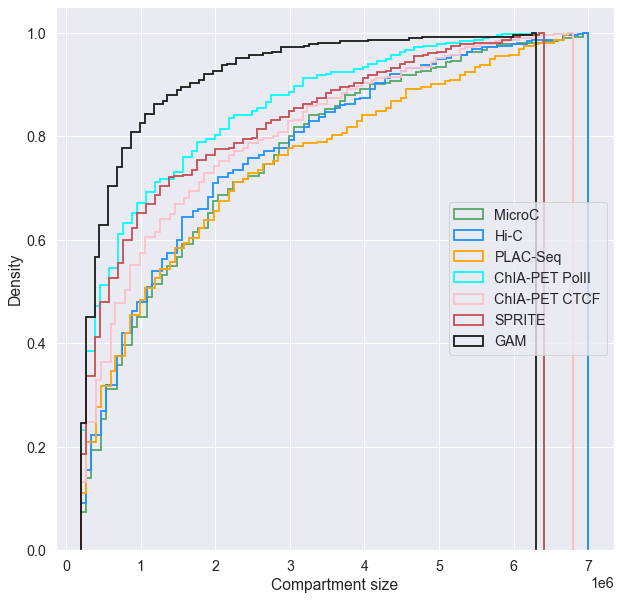

In [106]:
gs = GridSpec(nrows=1, ncols=1)
plt.figure(figsize=(10,10))


names = [      
"MicroC",
"Hi-C",
"PLAC-Seq",
"ChIA-PET PolII",
"ChIA-PET CTCF",
"SPRITE",
"GAM"]

files=[    
"4DNFI9GMP2J8_H1-hESC_MicroC.cis.100000.vecs.tsv",
"4DNFI82R42AD_H1-hESC_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv",
"4DNFICOGAKW2_H1-hESC_PLAC-Seq.cis.100000.vecs.tsv",
"4DNFIF1J6GC5_H1-hESC_ChIA_PET_PolII.cis.100000.vecs.tsv",
"4DNFIK3276U7_H1-hESC_ChIA_PET_CTCF.cis.100000.vecs.tsv",
"4DNFITX6WCRT_H1-hESC_DNA.cis.100000.vecs.tsv",
"GAM_H1_new.ALL.AB.at100Kb.final.chosen_formatted.tsv"]
  
    


c=['g','dodgerblue','orange','cyan','pink','r','k']




k=0
ax = plt.subplot(gs[0])
for file in files:
    print(file)
    data = pd.read_csv(file,sep="\t")
    print(data.shape)
    d=data
    A_start=[]
    A_end=[]
    B_start=[]
    B_end=[]
    A_size=[]
    B_size=[]
    E1=d.columns.get_loc("E1")
    for i in range(len(d["E1"])-1):
        if (d.iloc[i,E1]>0) & (d.iloc[i+1,E1]>0):
            A_val=d.iloc[i,E1]
            A_start.append(d.iloc[i,1])
            A_end.append(d.iloc[i,2])
        if (d.iloc[i,E1]>0) & (d.iloc[i+1,E1]<0):
            B_start=[]
            B_end=[]
            if(len(A_end))>0:
                A_size.append(max(A_end)-min(A_start))
            else:
                A_size.append(d.iloc[i,2]-d.iloc[i,1])
        if (d.iloc[i,E1]<0) & (d.iloc[i+1,E1]<0):
            B_val=d.iloc[i,E1]
            B_start.append(d.iloc[i,1])
            B_end.append(d.iloc[i,2])
            #print("-")         
        if (d.iloc[i,E1]<0) & (d.iloc[i+1,E1]>0):
            A_start=[]
            A_end=[]
            if(len(B_end))>0:
                B_size.append(max(B_end)-min(B_start))
            else:
                B_size.append(d.iloc[i,2]-d.iloc[i,1] )
    bins=100
    print(len(B_size))
    B_size=[x for x in B_size if 100000 < x <= 7000000]
    print(len(B_size))
    B_size_subset=sample(B_size,350)
    n, bins, patches = ax.hist(B_size_subset,bins=bins,density=True, histtype='step',color=c[k],
                           cumulative=True, label=names[k],linewidth=1.8)
    ax.grid(True)
    ax.legend(loc='right')
    ax.set_xlabel('Compartment size')
    ax.set_ylabel('Density')
    #plt.xscale('log')
    k=k+1
plt.savefig(out_path+"Supp_Figure_2d_H1-hESC_comp_size_B.pdf")


4DNFI9FVHJZQ_HFFc6_MicroC.cis.100000.vecs.tsv
(30895, 8)
814
4DNFI9REIU8H_HFFc6_PLAC-Seq.cis.100000.vecs.tsv
(30895, 8)
719
4DNFIAVXXO55_HFFc6_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv
(30895, 8)
811
4DNFIELOAD41_HFFc6_ChIA_PET_CTCF.cis.100000.vecs.tsv
(30895, 8)
931
4DNFIOOSHTQV_HFFc6_ChIA_PET_PolII.cis.100000.vecs.tsv
(30895, 8)
943
4DNFIP9HGF9M_HFFc6_SPRITE.100000.cis.vecs.tsv
(30894, 8)
469


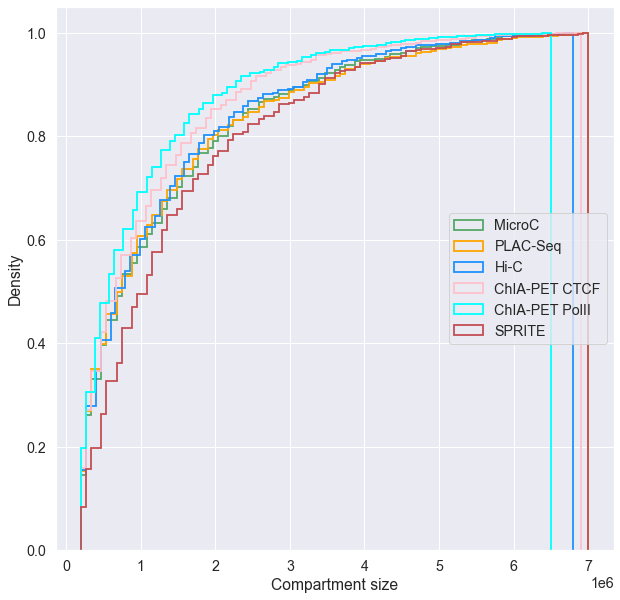

In [107]:

os.chdir("compartments/")


gs = GridSpec(nrows=1, ncols=1)
plt.figure(figsize=(10,10))


names = ["MicroC",
"PLAC-Seq",
"Hi-C",
"ChIA-PET CTCF",
"ChIA-PET PolII",
"SPRITE"]

files=[
"4DNFI9FVHJZQ_HFFc6_MicroC.cis.100000.vecs.tsv",
"4DNFI9REIU8H_HFFc6_PLAC-Seq.cis.100000.vecs.tsv",
"4DNFIAVXXO55_HFFc6_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv",
"4DNFIELOAD41_HFFc6_ChIA_PET_CTCF.cis.100000.vecs.tsv",
"4DNFIOOSHTQV_HFFc6_ChIA_PET_PolII.cis.100000.vecs.tsv",
"4DNFIP9HGF9M_HFFc6_SPRITE.100000.cis.vecs.tsv"]
c=['g','orange','dodgerblue','pink','cyan','r']


k=0
ax = plt.subplot(gs[0])
for file in files:
    print(file)
    data = pd.read_csv(file,sep="\t")
    print(data.shape)
    d=data
    A_start=[]
    A_end=[]
    B_start=[]
    B_end=[]
    A_size=[]
    B_size=[]
    E1=d.columns.get_loc("E1")
    for i in range(len(d["E1"])-1):
        if (d.iloc[i,E1]>0) & (d.iloc[i+1,E1]>0):
            A_val=d.iloc[i,E1]
            A_start.append(d.iloc[i,1])
            A_end.append(d.iloc[i,2])
        if (d.iloc[i,E1]>0) & (d.iloc[i+1,E1]<0):
            B_start=[]
            B_end=[]
            if(len(A_end))>0:
                A_size.append(max(A_end)-min(A_start))
            else:
                A_size.append(d.iloc[i,2]-d.iloc[i,1])
        if (d.iloc[i,E1]<0) & (d.iloc[i+1,E1]<0):
            B_val=d.iloc[i,E1]
            B_start.append(d.iloc[i,1])
            B_end.append(d.iloc[i,2])
        if (d.iloc[i,E1]<0) & (d.iloc[i+1,E1]>0):
            A_start=[]
            A_end=[]
            if(len(B_end))>0:
                B_size.append(max(B_end)-min(B_start))
            else:
                B_size.append(d.iloc[i,2]-d.iloc[i,1] )
    bins=100
    A_size=[x for x in A_size if 100000 < x <= 7000000]
    print(len(A_size))
    A_size_subset=sample(A_size,460)
    n, bins, patches = ax.hist(A_size,bins=bins,density=True, histtype='step',color=c[k],
                           cumulative=True, label=names[k],linewidth=1.8)
    ax.grid(True)
    ax.legend(loc='right')
    ax.set_xlabel('Compartment size')
    ax.set_ylabel('Density')
    k=k+1
plt.savefig(out_path+"Supp_Figure_2e_HFFc6_comp_size_A.pdf")

4DNFI9FVHJZQ_HFFc6_MicroC.cis.100000.vecs.tsv
(30895, 8)
1227
880
4DNFI9REIU8H_HFFc6_PLAC-Seq.cis.100000.vecs.tsv
(30895, 8)
1259
863
4DNFIAVXXO55_HFFc6_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv
(30895, 8)
1224
883
4DNFIELOAD41_HFFc6_ChIA_PET_CTCF.cis.100000.vecs.tsv
(30895, 8)
1478
985
4DNFIOOSHTQV_HFFc6_ChIA_PET_PolII.cis.100000.vecs.tsv
(30895, 8)
1794
997
4DNFIP9HGF9M_HFFc6_SPRITE.100000.cis.vecs.tsv
(30894, 8)
729
476


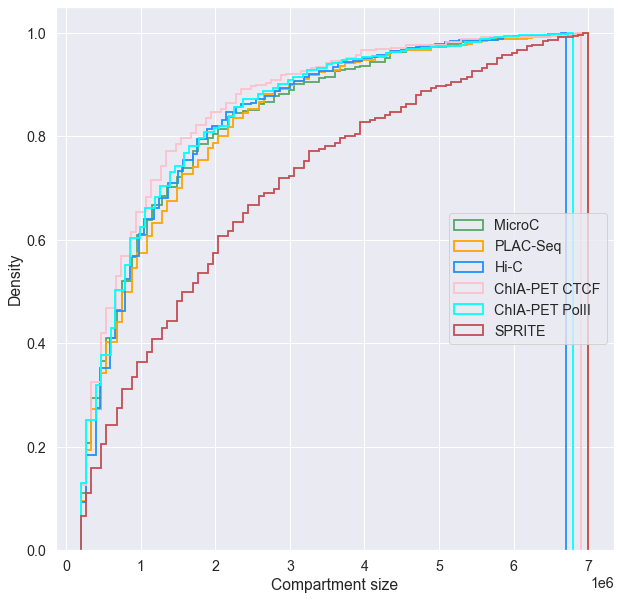

In [108]:

import numpy as np
import matplotlib.pyplot as plt
from random import sample


os.chdir("compartments/")


gs = GridSpec(nrows=1, ncols=1)
plt.figure(figsize=(10,10))


names = ["MicroC",
"PLAC-Seq",
"Hi-C",
"ChIA-PET CTCF",
"ChIA-PET PolII",
"SPRITE"]

files=[
"4DNFI9FVHJZQ_HFFc6_MicroC.cis.100000.vecs.tsv",
"4DNFI9REIU8H_HFFc6_PLAC-Seq.cis.100000.vecs.tsv",
"4DNFIAVXXO55_HFFc6_FA_DSG_DpnII_Hi-C.cis.100000.vecs.tsv",
"4DNFIELOAD41_HFFc6_ChIA_PET_CTCF.cis.100000.vecs.tsv",
"4DNFIOOSHTQV_HFFc6_ChIA_PET_PolII.cis.100000.vecs.tsv",
"4DNFIP9HGF9M_HFFc6_SPRITE.100000.cis.vecs.tsv"]

c=['g','orange','dodgerblue','pink','cyan','r']



k=0
ax = plt.subplot(gs[0])
for file in files:
    print(file)
    data = pd.read_csv(file,sep="\t")
    print(data.shape)
    d=data
    A_start=[]
    A_end=[]
    B_start=[]
    B_end=[]
    A_size=[]
    B_size=[]
    E1=d.columns.get_loc("E1")
    for i in range(len(d["E1"])-1):
        if (d.iloc[i,E1]>0) & (d.iloc[i+1,E1]>0):
            A_val=d.iloc[i,E1]
            A_start.append(d.iloc[i,1])
            A_end.append(d.iloc[i,2])
        if (d.iloc[i,E1]>0) & (d.iloc[i+1,E1]<0):
            B_start=[]
            B_end=[]
            if(len(A_end))>0:
                A_size.append(max(A_end)-min(A_start))
            else:
                A_size.append(d.iloc[i,2]-d.iloc[i,1])
        if (d.iloc[i,E1]<0) & (d.iloc[i+1,E1]<0):
            B_val=d.iloc[i,E1]
            B_start.append(d.iloc[i,1])
            B_end.append(d.iloc[i,2])
        if (d.iloc[i,E1]<0) & (d.iloc[i+1,E1]>0):
            A_start=[]
            A_end=[]
            if(len(B_end))>0:
                B_size.append(max(B_end)-min(B_start))
            else:
                B_size.append(d.iloc[i,2]-d.iloc[i,1] )
    bins=100
    print(len(B_size))
    B_size=[x for x in B_size if 100000 < x <= 7000000]
    print(len(B_size))
    B_size_subset=sample(B_size,470)
    n, bins, patches = ax.hist(B_size_subset,bins=bins,density=True, histtype='step',color=c[k],
                           cumulative=True, label=names[k],linewidth=1.8)
    ax.grid(True)
    ax.legend(loc='right')
    ax.set_xlabel('Compartment size')
    ax.set_ylabel('Density')
    #plt.xscale('log')
    k=k+1
plt.savefig(out_path+"Supp_Figure_2e_HFFc6_comp_size_B.pdf")